# EJERCICIO
# Aprendizaje supervisado: Clasificación.

## *Clasificación binaria de precios de electricidad en el Mercado Diario*

**Objetivo:** Imaginando que estamos a medioados de 2020, predecir en qué **horas** el precio de la electricidad en el Mercado Diario será elevado, siendo la **clase 0** para valores menores a 40 €, y **clase 1** para valores mayores a 40 €.  Se utilizará el contexto y datos históricos del **2020** de la variable target que queremos clasificar y de otros atributos (features) que pueden ayudar a predecir modelo.


Una técnica ampliamente adoptada para tratar conjuntos de datos muy desequilibrados se denomina remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo) y/o añadir más ejemplos de la clase minoritaria (sobremuestreo).

# Pasos para crear un modelo de machine learning

<img src="https://raw.githubusercontent.com/pelaokano/inel_ML/main/Modulo5/imagenes/creacion-modeloML.png" alt="Drawing" style="width: 800px;"/>


# 1. Importar librerias

In [3]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

## Cargamos el dataset 

In [4]:
dataset = pd.read_excel('precios.xlsx')

In [6]:
#Verifico la cantidad de filas y columnas del dataset
dataset.shape

(4223, 14)

In [7]:
#Verifico las 5 primeras filas de los datos 
dataset.head()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,menor que 40 euros


In [8]:
#Veo los 5 valores finales 
dataset.tail()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28,menor que 40 euros
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28,mayor que 40 euros
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28,menor que 40 euros
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28,mayor que 40 euros
4222,23,26,6,2650.6,3676.9,26581.4,6650.9,3209.0,5065.4,946.0,358,38.63,7.28,menor que 40 euros


In [9]:
# Reviso el formato de los datos
dataset.dtypes

hora                           int64
dia                            int64
mes                            int64
hidraul                      float64
eolica                       float64
demanda                      float64
ciclocomb                    float64
cogener                      float64
nuclear                      float64
carbon                       float64
biomas                         int64
precio-elect-dia-anterior    float64
MIBGAS-dia-anterior          float64
precio                        object
dtype: object

In [10]:
# Saco estadisticas 
dataset.describe()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
count,4223.000000,4223.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000
mean,11.502250,15.411556,3.443287,3090.683495,6142.901373,20223.538578,2337.097135,3059.788942,6019.210466,674.060308,374.144684,28.813694,8.288518
std,6.922282,8.598094,1.674775,1398.795645,3488.275912,3945.242127,1488.503359,282.994453,1212.068728,444.206117,102.061931,10.929161,2.347374
min,0.000000,1.000000,1.000000,856.600000,614.400000,0.000000,460.000000,1825.500000,3410.200000,0.000000,197.000000,1.020000,4.170000
25%,6.000000,8.000000,2.000000,1924.150000,3447.650000,17123.000000,1255.600000,2909.150000,4886.200000,413.000000,287.000000,21.080000,6.040000
50%,12.000000,15.000000,3.000000,2760.400000,5394.900000,20094.500000,1962.600000,3089.300000,6730.500000,530.000000,373.000000,28.410000,8.180000
75%,17.500000,23.000000,5.000000,4126.450000,8229.350000,22871.725000,2893.350000,3238.150000,7089.500000,973.000000,462.000000,36.670000,9.975000
max,23.000000,31.000000,6.000000,7411.900000,18996.300000,35458.900000,9078.400000,3696.800000,7100.500000,2065.000000,551.000000,62.480000,14.480000


In [12]:
# Revios si hay o no hay nulos 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hora                       4223 non-null   int64  
 1   dia                        4223 non-null   int64  
 2   mes                        4223 non-null   int64  
 3   hidraul                    4223 non-null   float64
 4   eolica                     4223 non-null   float64
 5   demanda                    4220 non-null   float64
 6   ciclocomb                  4223 non-null   float64
 7   cogener                    4223 non-null   float64
 8   nuclear                    4223 non-null   float64
 9   carbon                     4220 non-null   float64
 10  biomas                     4223 non-null   int64  
 11  precio-elect-dia-anterior  4223 non-null   float64
 12  MIBGAS-dia-anterior        4223 non-null   float64
 13  precio                     4223 non-null   objec

<div class="alert alert-success">
    <b> ¿Falta algún dato? De ser así, indica cuántos y en que atributo </b>
</div>

In [13]:
dataset.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
precio                       0
dtype: int64

<div class="alert alert-success">
    <b> Estan las etiquetas balanceadas? </b>
</div>

In [15]:
#Elijo precio, ya que es la variable a ser clasificada
balance_clases = dataset['precio'].value_counts()
print(balance_clases)

menor que  40 euros    3507
mayor que  40 euros     716
Name: precio, dtype: int64


<Axes: ylabel='precio'>

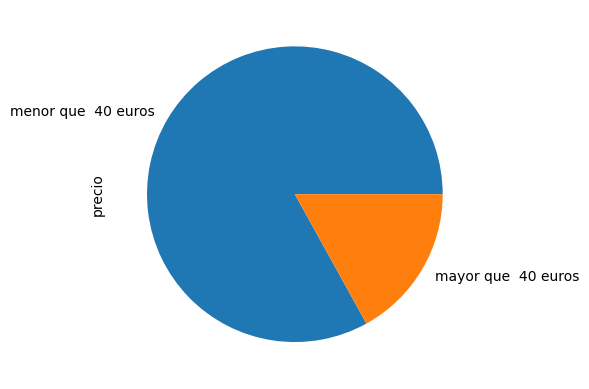

In [17]:
#Grafdica del desbalance en un pie
balance_clases.plot.pie()

# Resampling metodo


In [21]:
df_mayoria = dataset[dataset['precio'] == 'menor que  40 euros']
df_minoria = dataset[dataset['precio'] == 'mayor que  40 euros']

In [22]:
df_minoria

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
7,7,2,1,5017.1,1913.8,13248.3,2345.1,2480.7,7094.6,387.0,354,30.00,11.27,mayor que 40 euros
8,8,2,1,5260.7,1704.3,13628.5,2307.5,2473.1,7093.6,387.0,477,30.65,11.27,mayor que 40 euros
9,9,2,1,5330.8,1539.4,14256.6,2307.5,2491.2,7093.6,387.0,450,30.65,11.27,mayor que 40 euros
10,10,2,1,5658.3,1353.4,15053.8,1977.5,2522.9,7094.6,387.0,427,30.27,11.27,mayor que 40 euros
11,11,2,1,5689.7,1137.9,15410.5,1977.5,2542.8,7093.6,387.0,219,30.34,11.27,mayor que 40 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,21,24,6,3510.8,4823.3,28716.8,6307.5,3160.6,5810.5,423.0,288,38.69,6.96,mayor que 40 euros
4199,0,26,6,3309.8,3444.1,24964.5,4861.9,3050.6,5068.2,432.0,387,40.75,7.28,mayor que 40 euros
4207,8,26,6,4516.6,1816.4,26802.2,7006.5,3157.7,5070.2,504.5,498,42.09,7.28,mayor que 40 euros
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28,mayor que 40 euros


<div class="alert alert-success">
    <b> Oversampling de la clase minoritaria </b>
</div>

Utilizaremos el módulo de remuestreo de Scikit-Learn para replicar aleatoriamente muestras de la clase minoritaria.

In [23]:
from sklearn.utils import resample

In [27]:
# upsample incrementar las muestras minoria
df_minoria_upsample = resample(df_minoria,
                               replace = True,
                               n_samples = len(df_mayoria),
                               random_state = 27)
                        


In [28]:
#Combino las muestras incrementadas de la clase menor con la clase mayor
df_upsample = pd.concat([df_mayoria, df_minoria_upsample])
df_upsample

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,menor que 40 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,9,24,1,6967.4,2849.2,26544.7,9078.4,3533.2,7096.5,1706.8,521,60.98,13.70,mayor que 40 euros
1192,16,20,2,3683.9,2876.0,22905.6,5507.4,3424.1,7086.0,1300.0,205,42.77,11.12,mayor que 40 euros
586,10,26,1,4991.0,2343.4,21026.6,5760.3,3268.5,7098.4,1493.0,390,48.42,11.65,mayor que 40 euros
576,0,26,1,4396.3,3018.6,19235.6,3118.8,3368.7,7098.4,1459.0,383,51.92,11.65,mayor que 40 euros


In [30]:
df_upsample['precio'].value_counts()

menor que  40 euros    3507
mayor que  40 euros    3507
Name: precio, dtype: int64

<div class="alert alert-success">
    <b> Grafico de nuevo el balance de clases, para comprobar que efectivamente están balanceadas. </b>
</div>

In [35]:
balance_clases = df_upsample['precio'].value_counts()
print(balance_clases)

menor que  40 euros    3507
mayor que  40 euros    3507
Name: precio, dtype: int64


<Axes: ylabel='precio'>

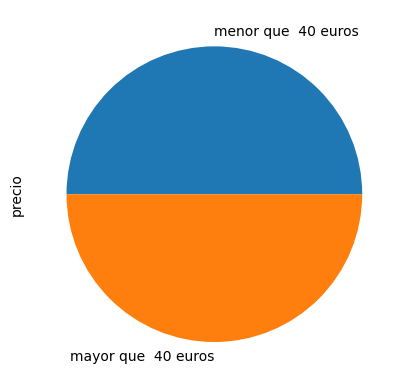

In [36]:
balance_clases.plot.pie()

In [38]:
# Nuevamente saco mi resumen estadistico 
df_upsample.describe()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
count,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7000.000000,7014.000000,7014.000000,7014.000000,7011.000000,7014.000000,7014.000000,7014.000000
mean,12.341745,15.317080,2.650413,3596.203593,6171.300257,20782.374014,2793.063730,3164.615469,6434.937468,903.918200,372.853151,34.400606,9.477933
std,6.785208,8.400353,1.676488,1497.802836,3512.623979,3789.828089,1705.497515,288.204753,1074.244996,500.405695,100.890999,11.749060,2.499900
min,0.000000,1.000000,1.000000,856.600000,614.400000,0.000000,460.000000,1825.500000,3410.200000,0.000000,197.000000,1.020000,4.170000
25%,7.000000,8.000000,1.000000,2218.500000,3408.725000,17732.800000,1526.250000,3008.100000,5906.500000,423.000000,288.000000,25.910000,7.590000
50%,12.000000,15.000000,2.000000,3548.400000,5448.250000,20946.700000,2299.700000,3193.300000,7087.000000,905.400000,372.500000,36.010000,9.880000
75%,18.000000,23.000000,4.000000,4828.800000,8175.700000,23459.425000,3878.000000,3387.800000,7091.600000,1337.000000,459.000000,43.010000,11.480000
max,23.000000,31.000000,6.000000,7411.900000,18996.300000,35458.900000,9078.400000,3696.800000,7100.500000,2065.000000,551.000000,62.480000,14.480000


## **3.- Visualización de datos**

Para poder entender los datos de entrada 
1. Histograma 
2. Curva de densidad
3. Boxplots
4. Matriz de correlación

<div class="alert alert-success">
    <b>Histograma </b>
</div>

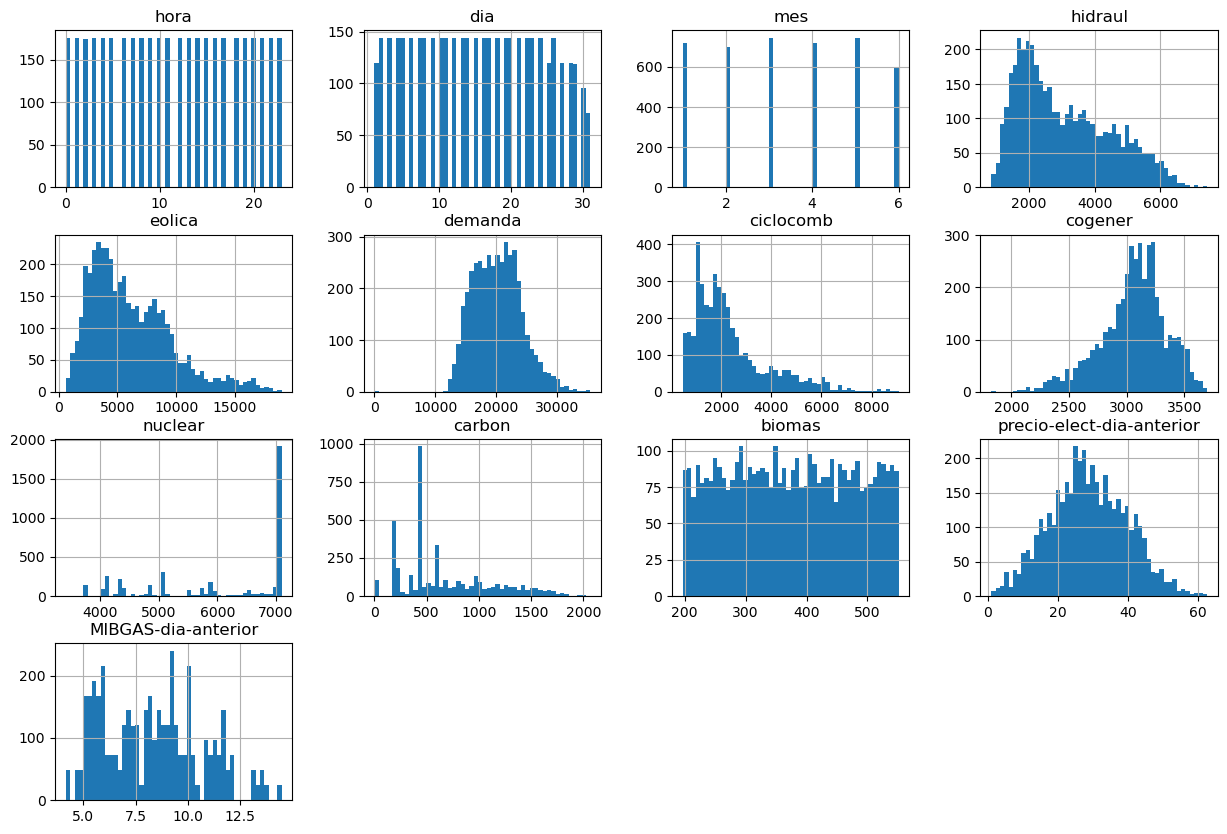

In [42]:
histograma_01 = dataset.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15,10))

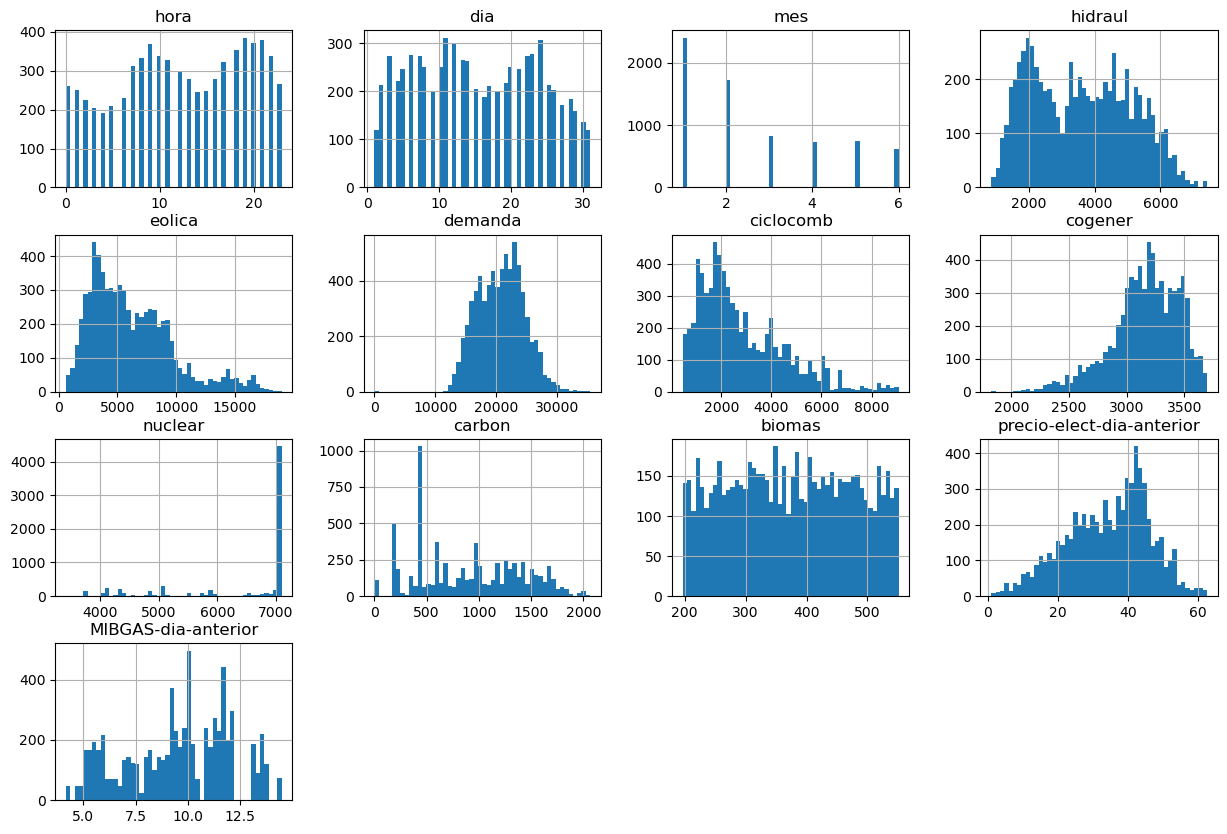

In [43]:
histograma_02 = df_upsample.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15,10))

<div class="alert alert-success">
    <b> Gráfico de densidades </b>
</div>

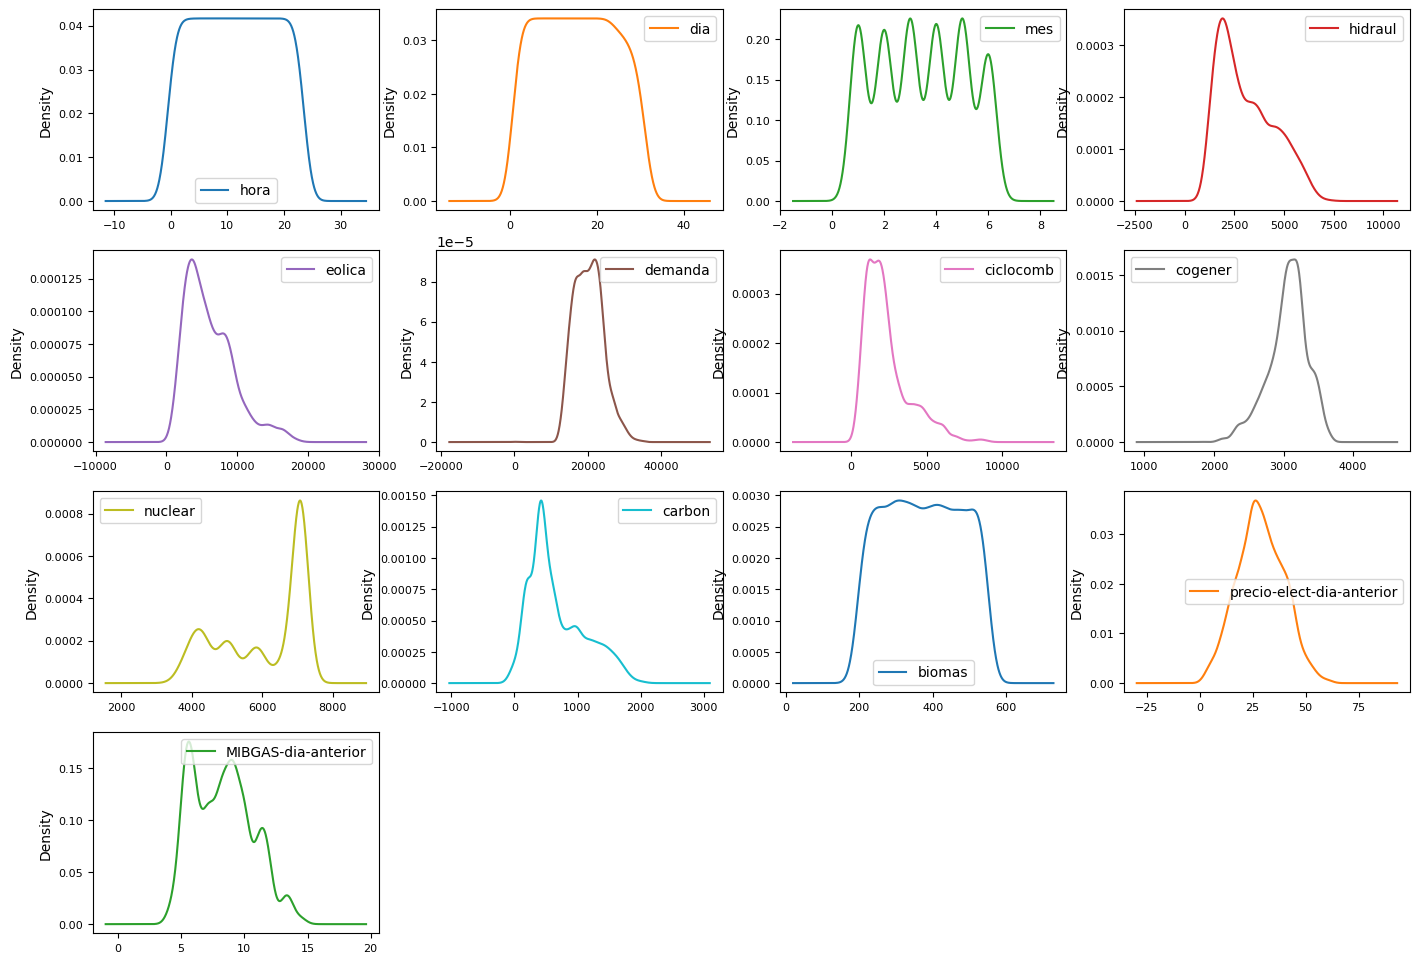

In [44]:
density_01 = dataset.plot(kind='kde', subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

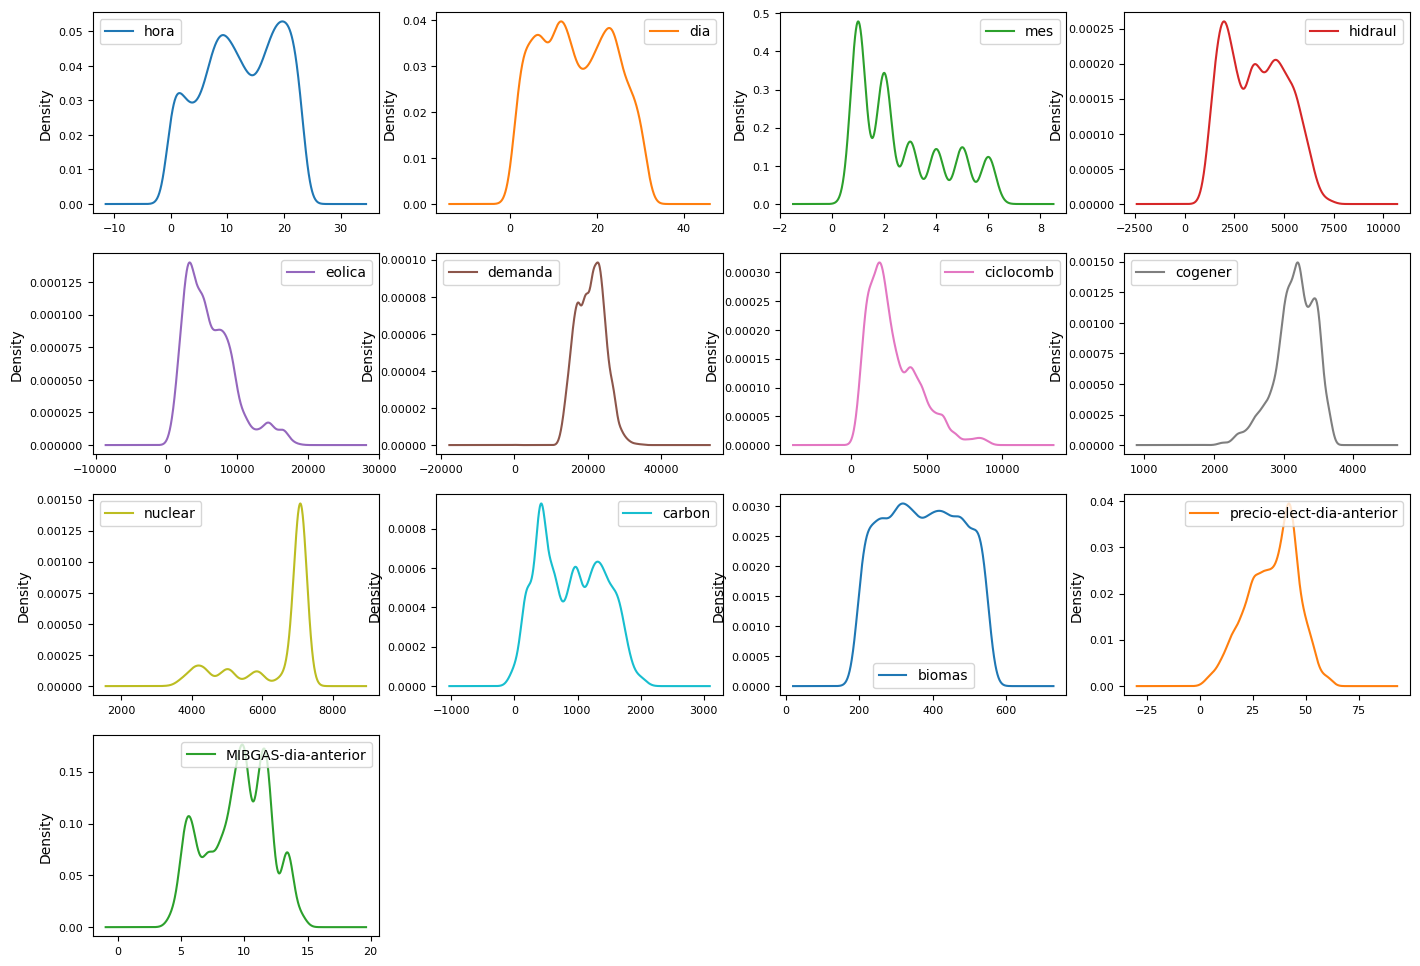

In [46]:
density = df_upsample.plot(kind='kde', subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

<div class="alert alert-success">
    <b> Boxplots </b>
</div>

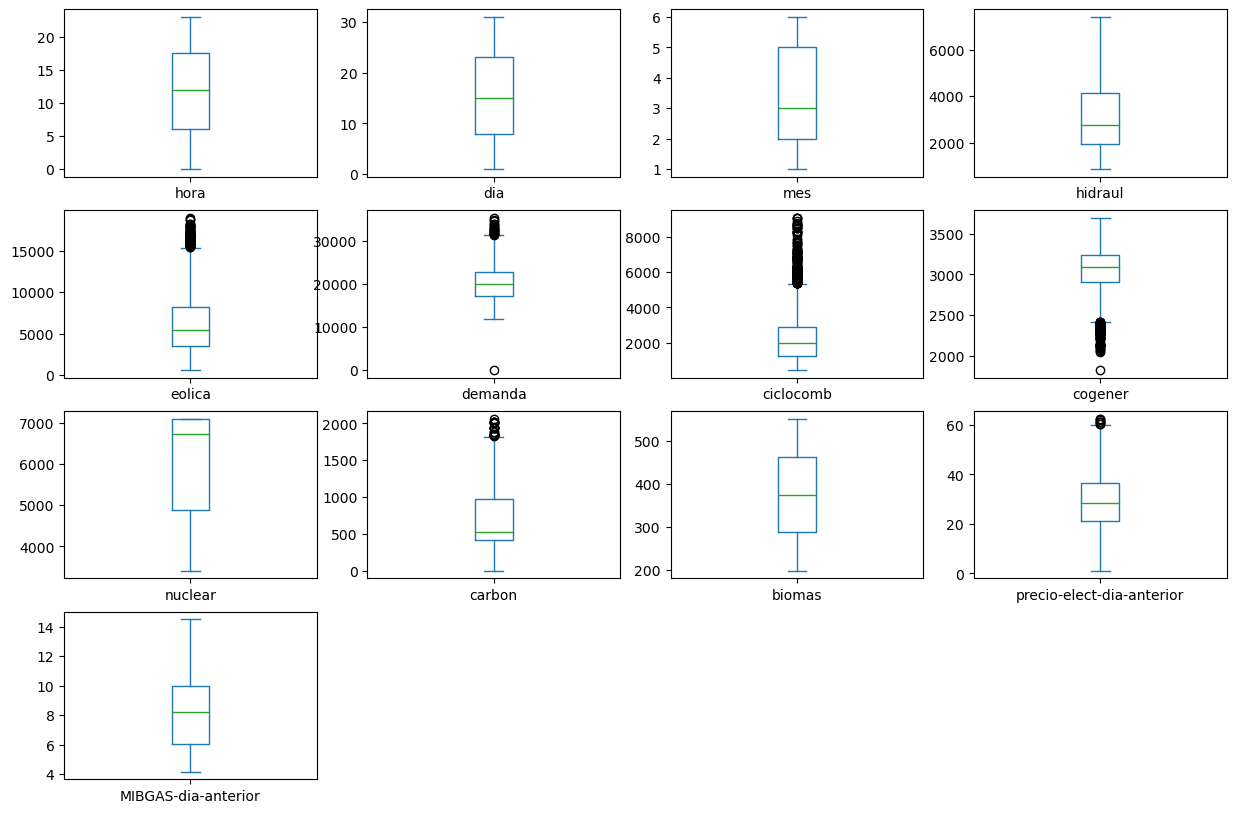

In [47]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

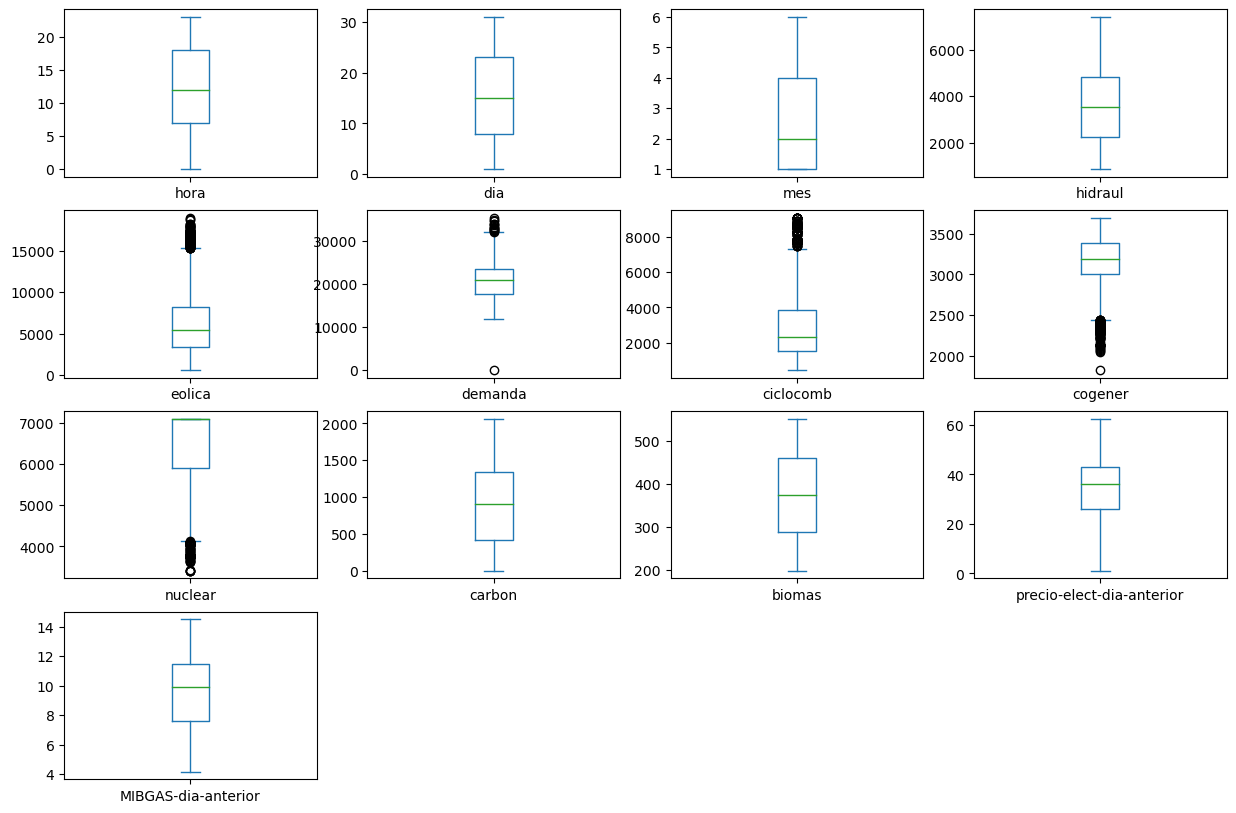

In [48]:
atributos_boxplot = df_upsample.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

<div class="alert alert-success">
    <b> Matriz de correlación </b>
</div>

Utilizamos el método de Spearman para evaluar la relación monótona entre dos variables contínuas. 

Comparación entre método de [Pearson y Spearman]

[Pearson y Spearman]: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 

In [50]:
import seaborn as sns

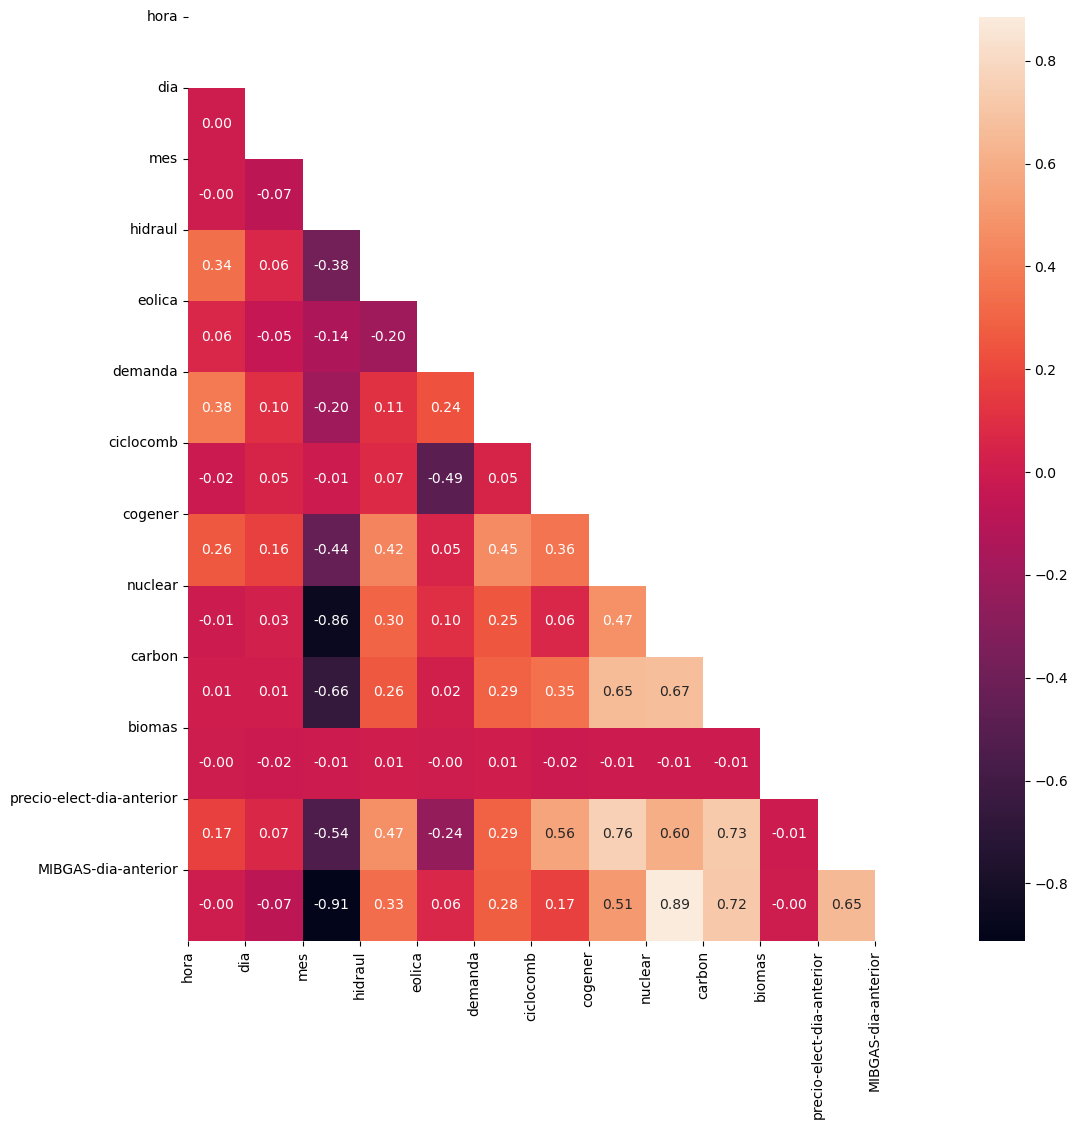

In [54]:
#Calcúlo el coeficiente de correlación 
corr_matrix_01 = dataset.corr(method='spearman') 

# Quitar valores repetidos
mask = np.zeros_like(corr_matrix_01, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix_01, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix_01.columns)), corr_matrix_01.columns);
    # yticks
plt.yticks(range(len(corr_matrix_01.columns)), corr_matrix_01.columns)
    # plot
plt.show()


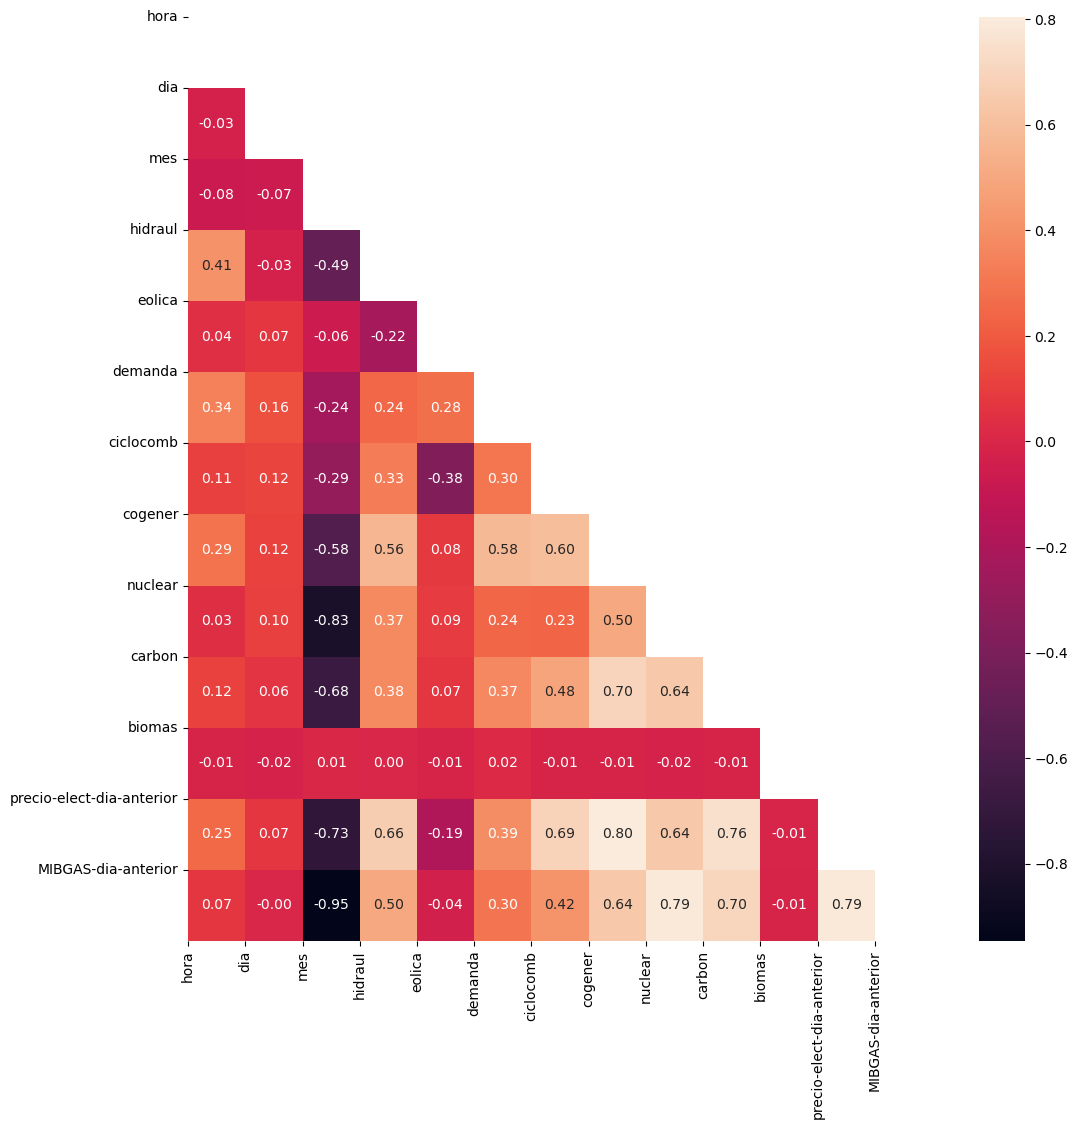

In [56]:
corr_matrix_02 = df_upsample.corr(method='spearman') 

# Quitar valores repetidos
mask = np.zeros_like(corr_matrix_02, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix_02, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix_02.columns)), corr_matrix_02.columns);
    # yticks
plt.yticks(range(len(corr_matrix_02.columns)), corr_matrix_02.columns)
    # plot
plt.show()


<div class="alert alert-success">
    <b> La etiqueta es de tipo ´´object´´, por lo que hay que transformarla a numérico </b>
</div>

No podemos ver la correlación con el precio, debemos pasarlo a numérico [LabelEncoder]


[LabelEncoder]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [58]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(dataset['precio'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

dataset['precio'] = lab_encoder.transform(dataset['precio'])
print(dataset)

[0 1]
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

      carbon  biomas  precio-elect-dia-anteri

In [62]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(df_upsample['precio'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

df_upsample['precio'] = lab_encoder.transform(df_upsample['precio'])
print(df_upsample)

['mayor que  40 euros' 'menor que  40 euros']
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
537      9   24    1   6967.4  2849.2  26544.7     9078.4   3533.2   7096.5   
1192    16   20    2   3683.9  2876.0  22905.6     5507.4   3424.1   7086.0   
586     10   26    1   4991.0  2343.4  21026.6     5760.3   3268.5   7098.4   
576      0   26    1   4396.3  3018.6  19235.6     3118.8   3368.7   7098.4   
612     12   27    1   2037.2  7244.0  19629.0     2693.8   3093.3   7096.2   

     